# Comparing Regional Energy Grid Consumption using Paired T-Testing and TBATS Time Series Analysis

D214: MSDA Graduate Capstone

Data Analytics Report and Executive Summary

Aaron Balke

S011005116

January 14th, 2023

# Research Question

For this capstone, my research question is "Is the difference between PJM regional max energy consumption means statistically
significant? And if so, can PJM Max Energy Load per Region be forecasted using TBATS time series modeling?".

Comparing and forecasting the maximum regional energy load of an energy grid will enable effective resource allocation, maintenance and repair estimation, and generalized executive decision-making. Using PJM’s energy load dataset, paired t-testing for comparing regions, and the advanced TBATS Time Series Analysis for forecasting complex seasonal components, we will be able to effectively compare and forecast regional max energy consumption.

PJM Interconnection LLC is a regional transmission organization in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia (Kaggle). PJM directly supplies their hourly energy load data on their website (pjm.com), which has been compiled onto Kaggle under a Public Domain License. This enables us to compare and forecast peak regional energy load for the energy grid, an important metric for maximizing resource allocation and estimating maintenance/repairs, to suit business interests. 

The provided 2002 to 2018 dataset for the Western and Eastern regions of PJM will be used to create a paired t-test to check if energy load means are statistically different between regions and create a TBATS model for time series analysis and forecasting.

Null hypothesis: The difference between PJM regional max energy consumption means is not statistically significant.
Alternate Hypothesis: The difference between PJM regional max energy consumption means is statistically significant.

A paired t-test has been chosen to evaluate if the difference in max regional energy consumption is statistically significant since it provides the ability to compare mean values of different regions, without requiring the removal of seasonal and trend components - components required for accurate differentiating in a business context.

# Data Collection

The dataset is published on Kaggle under a Public Domain License. Hourly data is provided for all regions between 1998-2002, and after 2002 data is split by region until 2018. Just the 2002-2018 data for PJM West (PJMW) and PJM East (PJME) will be used. PJMW consists of Ohio, West Virginia, and portions of Illinois, Pennsylvania, Kentucky, and Virginia, and PJME consists of New Jersey, Delaware, and Maryland. These regional files total, 288,572 records, with the West region missing the first four months of the year. The first four months of the East data will be removed, which will change our total to 286,412 records, setting the period of the analysis to be equal between regions.

| Feature                 | DataType     |
|-------------------------|--------------|
| Date Time               | Qualitative  |
| Energy Consumption (MW) | Quantitative |
| Region*                 | Qualitative  |

*Separate files are provided for each region, with identical features. However, the datasets will immediately be
merged to simplify analysis.

The data is originally provided directly from PJM’s website, where they provide metrics for the public to access. The data has been compiled and uploaded to Kaggle at https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption under a CC0: Public Domain License by Rob Mulla, a Senior Principal Data Scientist at H20.ai, an open-source AI/ML platform provider (Mulla).

One Major advantage of this data-gathering methodology is the ease of use. Instead of having to directly access PJM's data from their website, https://dataminer2.pjm.com/feed/hrl_load_metered/definition, historic data can be downloaded without creating an api connection, or understanding more complicated metrics included in the direct PJM dataset (PJM). Additionally, data has already been aggregated and rounded, the original PJM data provides 1000th of Megawatt load values, which is not required for our analysis. Additionally, PJM provides multiple measures of load for each region and time, each from a separate point of measurement which has been aggregated by our chosen Kaggle dataset.

One Major disadvantage of this data-gathering methodology is the integrity of the data. Using effectively a dataset "backup" provides its risks. First, data is not updated at the speed of the original dataset. The Kaggle version only has historical energy load data until 2018 and has not been updated since, while the PJM dataset is only two days behind. This means we are forced to make forecasts on historical data, not current data. Additionally, the integrity of the data could be altered by a third party since the data is not coming directly from PJM. However, after comparing records between PJM and the Kaggle version of the dataset, I can confirm the dataset integrity is intact.

Challenges with data collection did not arise, since the data has already been packaged nicely onto Kaggle. However, there were many minor problems assessed at data collection, that were fixed in data preparation. This comes down to data types. A major challenge was accurately converting the provided datetime feature into a data type Dataframes and the analysis could use. After grouping the data and confirming there were no gaps in the dataset, the simplest method was to increment on a preset date, rather than attempt to accurately parse 700+ date fields. Additionally, using Megawatts was already beginning to get out of hand with hourly values, after aggregation we have to convert to Gigawatts to continue to have a human-readable dataset.

# Data Extraction and Preparation

## Tools

The data extraction and preparation process for this analysis takes place in a Jupyter Notebook environment using the Python Programming language and Python libraries/modules.

Jupyter Notebook (6.5.2): Jupyter Notebook is being used for data preparation and analysis since it provides checkpoint functionality, the ability to save the state of a model or group of functions/commands to access later. This is important, particularly in our case, since we will not want to run the compute-intensive TBATS modeling every time we want to alter reports based on that model.

Python (3.10.9): Python is the chosen programming language, since it is straightforward, and provides strong module and library support. In the Data Analysis Domain, the ability to run complex analysis is a requirement. Unfortunately for most if not all languages this support is not built into the language, and the ability for a community to increase the functionality of the language is a requirement. In the case of Python, there exists a thriving community of data scientists creating open-source tools for data analytics.

Pandas: Pandas are required for our data extraction and preparation since they provide the Dataframe object, an object that allows easy manipulation of tabular data. 

The one major advantage of pandas dataframes over alternatives such as Numpy Arrays or default data structures, is that pandas dataframes can have indexes set to a datetime feature, automating analysis in supported time series packages. This removes some of the data preparation steps, making analysis more efficient.

A disadvantage of pandas, in our situation, is the limited datetime conversion support. With our dataset, parsing string values from the provided datetime feature resulted in many errors, since some values were unable to be converted. From my experience in building CLI tools, and Web Applications, I know this is not just a problem with pandas but rather programming in general. However, using Python, a dynamic programming language with little control over types, and the pandas package exasperated this problem. The solution I settled on was to completely replace the dates with a date in the correct data type, by creating a correct initial date in my required data type and incrementing that value for each record. This only worked because there were no missing dates, and data was previously aggregated. Another major reason for using pandas is the ability to apply operations across features with ease. In our process, this is most notable with converting Megawatts to Gigawatts, which requires each record's 'Load' Feature to be divided by 1000. Using pandas DataFrames this is simply "df['Load'] / 1000". If we had not used a dataframe this operation would have exploded into many lines of code or an SQL database.

Numpy: For extraction and preparation, numpy is not used directly, but pandas DataFrames are built on numpy Arrays and their operations. This is visible through our hourly to daily data aggregation, which uses .max() to get the max value from the hourly data. This is equivalent to, and I believe an abstraction, of the numpy .max() method. Additionally, numpy is used in the environment preparation to set the random state of the jupyter notebook, so all random state-based analysis is the same between runs.

Statsmodels: Statsmodels provides the main preparation for the paired t-testing. This includes adfuller - to run a Dickey-Fuller Test to confirm stationary time series data, zscore - for removing outliers, normaltest and qqplot for evaluating the normality of the data, and yeojohnson, to apply Yeo-Johnson Data Transformations to the dataset,  to normalize the data.

Other important processing steps to note, include the renaming of features, 'PJMW_MW' has been renamed to 'PJMW'. This is particularly important since we convert to Gigawatts by the end of data processing. Additionally, the last date of the dataset is removed. This is because it is not one full day of values, so after aggregation it does not accurately represent that day's max energy load. All other data preparation steps were described under the Pandas and Numpy explanations.

## Steps & Techniques

To begin, the environment is set up by importing the required libraries/modules, setting a random seed for results to be repeated, and the regional data is imported as separate dataframes.

In [1]:
# Environment Preparation

# Package Installation
!pip install tbats

# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# T-Test and Normality Imports
from scipy import stats
import statsmodels.graphics.gofplots as sm

# Time-Series Specific Imports
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tbats import TBATS

# Metric Imports
from sklearn.metrics import mean_squared_error

# Set Random Seed
np.random.seed(420)

In [2]:
# Import  Data
df_w = pd.read_csv('./PJMW.csv')
df_e = pd.read_csv('./PJME.csv')

After importing the data and libraries, both the East and West datasets have to have adjustments made before combining them.
1. Columns have to be renamed to remove inaccurate titles.
2. The Datetime Feature has to be converted from a string to a datetime data type. This is important for data aggregation in the next steps, which require a datetime datatype.
3. Hourly Data has to be aggregated by max value each Day. This removes a lot of the randomness caused by such small time slices (Grogan, 2022).
4. After Aggregation, new start dates are created manually in the optimal format, and for each region a new date feature is created by incrementing this start date. This ensures a completely new optimal date feature that we can set to be the index. Setting this Feature to be an index will make future time series analysis much easier since many Python libraries support automation based on a datetime index.
5. Finally, the Max Energy Consumption in Megawatts, is converted to Gigawatts for easier readability in future analysis.

In [3]:
for df in [df_w, df_e]:
    # Rename Columns
    if 'PJME_MW' in df.columns:
        df.rename(columns={'PJME_MW': 'PJME'}, inplace=True)
    else:
        df.rename(columns={'PJMW_MW': 'PJMW'}, inplace=True)

    # Convert String Datetime into date values
    df['Datetime'] = pd.to_datetime(
        df['Datetime'],
       format='%Y-%m-%d %H:%M:%S'
    ).dt.date

    # Aggregate data by Date, For each day, get highest recorded energy load
    df = df.groupby('Datetime').max().reset_index()

    # Set Start Date for Easy TS Analysis
    if 'PJME' in df.columns:
        start_date = pd.to_datetime("2002-01-01")
    else:
        start_date = pd.to_datetime("2002-04-01")

    # Create DataFrame Column to increment over index
    if 'PJME' in df.columns:
        df['j'] = df.index
    else:
        df['i'] = df.index

    # Increment over index and add that amount to start_date, get correct date type
    if 'PJME' in df.columns:
        df["Date"] = start_date + (df.j).astype('timedelta64[D]')
    else:
        df["Date"] = start_date + (df.i).astype('timedelta64[D]')

    # Drop unused Columns
    df.drop('Datetime', axis=1, inplace=True)

    # Set Index for TS Analysis
    df.set_index('Date', inplace=True)

    # Remove incomplete final date from dataset
    df = df.iloc[:-1]

    # Convert MW to GW
    if 'PJME' in df.columns:
        df['PJME'] = df['PJME'] / 1000
    else:
        df['PJMW'] = df['PJMW'] / 1000
    
    # Assign temp df to correct region df
    if 'PJME' in df.columns:
        df_e = df
    else:
        df_w = df

After preparing the data of both regions, the ranges are trimmed to be the same fixed length, and they are combined into one dataframe for future analysis.

In [4]:
# Set to be Same Time Range
df_e = df_e['2003-01-01':'2012-12-31']
df_w = df_w['2003-01-01':'2012-12-31']
print(df_e.shape, df_w.shape)

# Combine into 1 DataFrame
df = pd.concat([df_e, df_w], axis=1)

# Drop unused index
df.drop('j', axis=1, inplace=True)

# Save copy for time series analysis after paired t-testing
df_ts = df

(3653, 2) (3653, 2)


### Prepare for Paired T-Testing

There are 2 seasonal components, weekly and annual. These seasonal components and the trend component need to be included in our Paired T-testing since these are aspects we want to take into consideration for determining if the regions have significantly different max energy consumption values. However, the data range and sampling affect how strong the magnitude of these seasonal components is. For example, keeping our time-series frequency at a daily value causes a great amount of noise and makes the magnitude of the weekly component much stronger, on the opposite end of the spectrum, having too long of a range causes the annual component's magnitude, concerning the t-test, to become quite large. The best method to mitigate these problems is to use a limited range and resample the data to be monthly.

In [5]:
# Resample data to monthly frequency and select the maximum value for each month
df = df.resample('M').max()
df = df.reset_index()

After resampling we have to check for stationarity in the data for similar reasons to standard stationarity checks in time-series analysis. If the data is not stationary, we must replace the PJME and PJMW absolute energy consumption values with relative difference values, and drop nan values. The check for stationarity is completed using a Dickey-Fuller Test. With an adfuller test, if the calculated p-value is less than our alpha value of 0.05, then the data is stationary, greater than the alpha, it is not.

In [6]:
# PJME Dickey Fuller Test (Checks for Trends)
results = adfuller(df['PJME'])
pval = results[1]
print(f'P-Value of PJME Original Data: {round(pval, 4)}')
message = "not " if pval > 0.05 else ""
print(f'The Dataset is {message}stationary')

# PJMW Dickey Fuller Test (Checks for Trends)
results = adfuller(df['PJMW'])
pval = results[1]
print(f'P-Value of PJMW Original Data: {round(pval, 4)}')
message = "not " if pval > 0.05 else ""
print(f'The Dataset is {message}stationary')

P-Value of PJME Original Data: 0.1567
The Dataset is not stationary
P-Value of PJMW Original Data: 0.0839
The Dataset is not stationary


In [7]:
# Apply Difference since data is not stationary
df['PJME'] = df['PJME'].diff()
df['PJMW'] = df['PJMW'].diff()
df.dropna(inplace=True)

In [8]:
# PJME Dickey Fuller Test (Checks for Trends)
results = adfuller(df['PJME'])
pval = results[1]
print(f'P-Value of PJME Original Data: {round(pval, 4)}')
message = "not " if pval > 0.05 else ""
print(f'The Dataset is {message}stationary')

# PJMW Dickey Fuller Test (Checks for Trends)
results = adfuller(df['PJMW'])
pval = results[1]
print(f'P-Value of PJMW Original Data: {round(pval, 4)}')
message = "not " if pval > 0.05 else ""
print(f'The Dataset is {message}stationary')

P-Value of PJME Original Data: 0.0
The Dataset is stationary
P-Value of PJMW Original Data: 0.0
The Dataset is stationary


After making the data stationary, we then have to get the difference between PJME and PJMW. This is required for testing normality. Since paired t-testing compares the mean on the difference between groups, this difference has to be normally distributed, without outliers.

In [9]:
# Create Difference value
df['diff'] =  df['PJME'] - df['PJMW']

### Outliers & Normality Test

One major assumption of Paired T-testing, is that the data is normally distributed. To ensure this we will first check and remove outliers by using a Z-score greater than 3. Once outliers are removed, a D'Agostino-Pearson Noramility Test is run, to check if the data is normally distributed (Statistics Solutions, 2021). Using a D'Agostino-Pearson Noramility Test, the null hypothesis assumes a normal distribution, which means if the p-value is greater than our alpha of 0.05, the data is normally distributed, if it is less than it is not and the data cannot be used in a paired t-test without adjustments (Chugh, 2023). In this case, the data is not, so data transformations are applied to get a normal distribution (Schendzielorz, 2020). The data follows a shallow distribution, to fix, Box-Cox or Yeo-Johnson transformations are applied. Yeo-Johnson Power Transformation was chosen since Boxcox required all positive values, which we do not have in our difference feature. With this transformation, the difference data is now normally distributed (Yearsley, 2024).

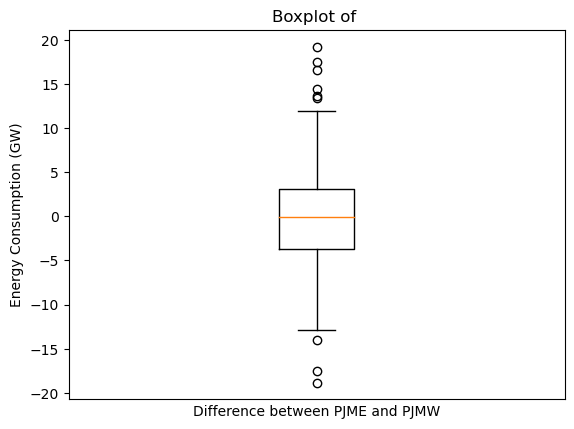

In [10]:
# Visualize Outliers
plt.boxplot(df['diff'])
plt.ylabel('Energy Consumption (GW)')
plt.xlabel('Difference between PJME and PJMW')
plt.xticks([])
plt.title("Boxplot of ")
plt.show()

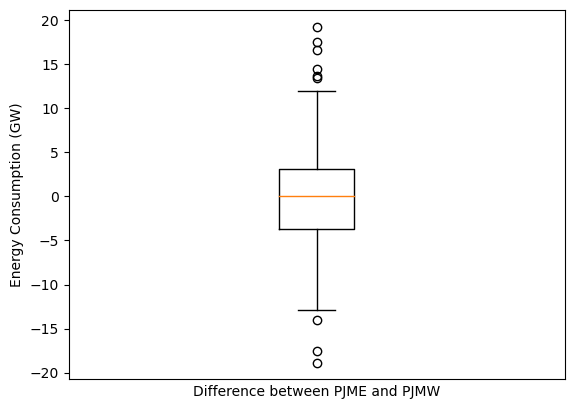

In [11]:
# Remove Outliers
z = np.abs(stats.zscore(df['diff']))
listz = np.where(z > 3)
df = df[~df.index.isin(listz[0].tolist())]

# Visualize Outliers
plt.boxplot(df['diff'])
plt.ylabel('Energy Consumption (GW)')
plt.xlabel('Difference between PJME and PJMW')
plt.xticks([])
plt.show()

D'Agostino-Pearson Test P-Value:  0.04388589914180802


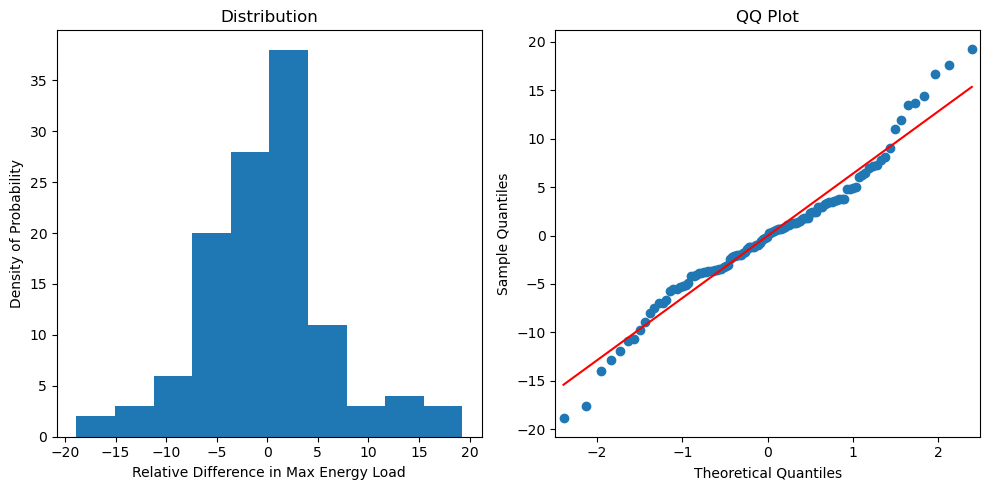

In [12]:
# Verify Differences are Normally Distributed

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

stat, p_value = stats.normaltest(df['diff'])
print("D'Agostino-Pearson Test P-Value: ", p_value)

ax1.hist(df['diff'])
ax1.set_title("Distribution")
ax1.set_ylabel("Density of Probability")
ax1.set_xlabel("Relative Difference in Max Energy Load")

sm.qqplot(df['diff'], line='s', ax=ax2)
ax2.set_title("QQ Plot")

plt.tight_layout()
plt.show()

D'Agostino-Pearson Test P-Value:  0.06884938605631735


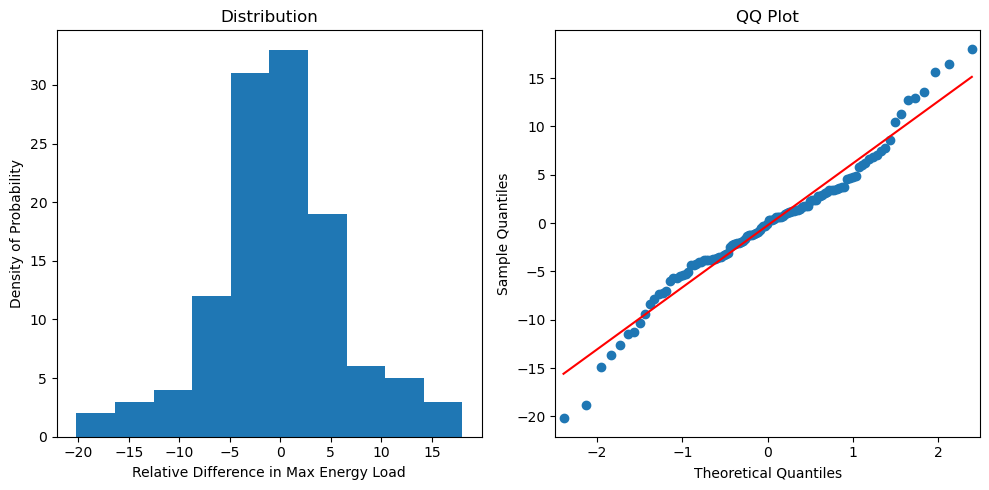

In [13]:
# Apply Transformations
maxLmbda = stats.yeojohnson_normmax(df['diff'])
data_trans = stats.yeojohnson(df['diff'], lmbda=maxLmbda)

# Recheck Normal Distribution
stat, p_value = stats.normaltest(data_trans)
print("D'Agostino-Pearson Test P-Value: ", p_value)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.hist(data_trans)
ax1.set_title("Distribution")
ax1.set_ylabel("Density of Probability")
ax1.set_xlabel("Relative Difference in Max Energy Load")

sm.qqplot(data_trans, line='s', ax=ax2)
ax2.set_title("QQ Plot")

plt.tight_layout()
plt.show()

Now with a normally distributed difference feature, the same data transformations have to be applied to our PJME and PJMW values, which are at this time, relative to each feature's previous value (not absolute energy consumption values). This has to be done since the paired t-test takes in the PJME and PJMW features, not the difference values directly.

In [14]:
# Apply the same data transformations to the original data for Paired T-Testing
e_clean = stats.yeojohnson(df['PJME'], lmbda=maxLmbda)
w_clean = stats.yeojohnson(df['PJMW'], lmbda=maxLmbda)

# Data Analysis

## Paired T-Testing

Paired T-testing is used to compare the two regional groups of PJM max energy load because it is a parametric procedure that can conclude if the differences in mean between groups are significant. 

One major advantage of paired t-testing is that the parameters that are shared and not shared between regions can be unknown, making paired t-testing a good option for a comparison analysis where we do not know the cause of seasonal components, trends, and residuals. Assumptions can be made, such as assuming an annual weather seasonal component, however, knowing how this changes between regions, can be much more complicated.

One major disadvantage of paired t-testing is that it requires a normal distribution of data. The statistical inference completed in this parametric procedure requires normality for accurate inferences. If the data was not normally distributed, an alternative test would have to be completed, such as the Wilcoxon signed-rank test, a non-parametric test (Adam, 2023).

At this point, the Paired T-Test to compare the means of the different regions can be run, since we confirmed normally distributed data, and removed outliers. The two datasets being compared are inputted as arguments, and the t-statistic and p-value are returned. With a Paired T-test, the null hypothesis is that the mean difference between the two groups is zero, there is no significant difference between the means of the groups. The alternative hypothesis is that there is a significant difference, and the mean difference between the two groups is not zero. If the null hypothesis is met, observed differences can be explained as random variation. An alpha value of 0.05 will be used, to evaluate the paired t-test.

In [15]:
# Paired t-test
t_stat, p_val = stats.ttest_rel(e_clean, w_clean) 
print("t-statistic =\t" + str(round(t_stat, 4)))  
print("p-value =\t " + str(round(p_val, 4)))

t-statistic =	-0.4532
p-value =	 0.6512


With a p-value greater than 0.05 (alpha), we can conclude that the two groups are not significantly different, and any perceived differences between PJM East and West regional max energy consumption can be explained as random variation. From a practical perspective, this means trends and seasonal components are similar between regions, for example, the annual seasonal components are shared between regions, causing both to have similar increases in max energy consumption in the winter and summer. To visualize this, the following graph shows the relative difference values between PJME and PJMW, with scales adjusted.

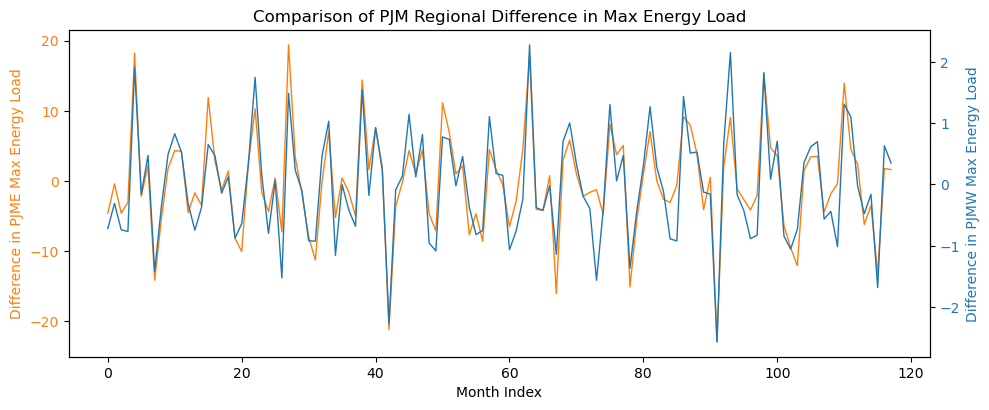

In [16]:
# Plot of PJME and PJMW Regional Difference in Max Energy Load
fig, ax1 = plt.subplots(figsize=(10, 4))

color = 'tab:orange'
ax1.plot(e_clean, color=color, linestyle='-', linewidth=1, label='PJME')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("Difference in PJME Max Energy Load", color='tab:orange')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(w_clean, color=color, linestyle='-', linewidth=1, label='PJMW')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Difference in PJMW Max Energy Load", color='tab:blue')

ax1.set_xlabel("Month Index")
fig.tight_layout()
plt.title("Comparison of PJM Regional Difference in Max Energy Load")
plt.show()

## TBATS Time-Series Analysis

Since the Western and Eastern regions are not significantly different, we can combine the data to create a Total PJM max energy consumption dataset. The creation of a single model to forecast PJM energy load, will apply to both regions, and allow for resource allocation, equipment maintenance/repair, and executive decision-making.

The time series analysis started with an ARIMA/SARIMAX model in mind. The conclusions created by the end altered this to a TBATS analysis.
1. Observed Data Visualization: The observed data is visualized to look for any immediate aspects that stand out. There are two major waves in the max energy load, across each year, implying a possible annual or biannual seasonality.
2. Dickey Fuller: A Dickey-Fuller test is run to check if the data is stationary. Using an alpha value of 0.05, a p-value less than the alpha implies we are 95% sure the data is stationary. With our p-value of 0.0, we can confirm it is. this is important since nonstationary data can lead to incorrect or misleading conclusions.
3. Decomposition: The time series data is decomposed, to split it into its components. I opted to keep the magnitude of the y scale equal across visualizations, to preserve the relative size of each component, by default the data scales with the plot. By doing this we can see the trend component has the highest magnitude, and the seasonal component was not the one we visually saw in the first part of our exploratory data analysis. The seasonal component we saw is appearing in the trend component.
4. Autocorrelation: To understand why this is occurring with the seasonal component, we will run autocorrelation on the seasonal component and the observed data. With autocorrelation, correlation coefficients that get near a value of 1 are measured against each other to get the period length of the component. By doing so we can see a seasonal component has a period of 7 days (1 Week), and the observed data has one of 365.25 (1 Year). It is important to note, a small rise occurs in the observed data around 182 days into the data. By understanding the dataset we can assume this is a winter wave. The largest peak/wave is for summer, when individuals run air conditioning, and the smaller winter peak/wave is from people running heating. This matches my personal experience, and I believe if the climate was different these peaks would be lower, nonexistent, or replace each other in magnitude. From the paired t-test we can assume the climate is not significantly different between PJM West and East regions.

After completing our exploratory data analysis we can confirm the existence of two seasonal components, the weekly component, and the annual component. At this time, the complication is that ARIMA/SARIMAX models can only handle one seasonal component, and will lose the ability to accurately model our data. To remedy this, I will be using a TBATS model.

In [17]:
# Combine PJME and PJMW data into one dataframe for time series analysis, and remove unneeded features
df_ts['Load'] = df_ts['PJME'] + df_ts['PJMW']
df_ts.drop(['i', 'PJME', 'PJMW'], axis=1, inplace=True)
df_ts.head()

,Load
Date,
2003-01-01,38.968
2003-01-02,45.521
2003-01-03,45.687
2003-01-04,42.451
2003-01-05,43.413


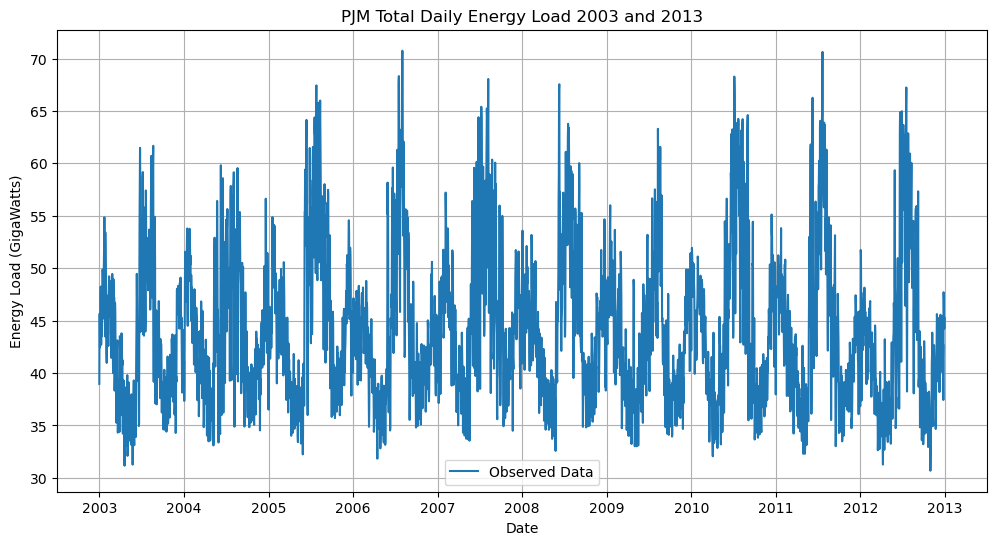

In [18]:
# Plot Observed Daily Data
plt.figure(figsize=(12,6))
plt.plot(df_ts, label="Observed Data")
plt.grid()
plt.title("PJM Total Daily Energy Load 2003 and 2013")
plt.xlabel("Date")
plt.ylabel("Energy Load (GigaWatts)")
plt.legend(loc="lower center")
plt.show()

In [19]:
# Dickey Fuller Test (Checks for Trends)
results = adfuller(df_ts['Load'])
pval = results[1]
print(f'P-Value of Original Data: {pval.round(10)}')
message = "not " if pval > 0.05 else ""
print(f'The Dataset is {message}stationary')

P-Value of Original Data: 8.6e-09
The Dataset is stationary


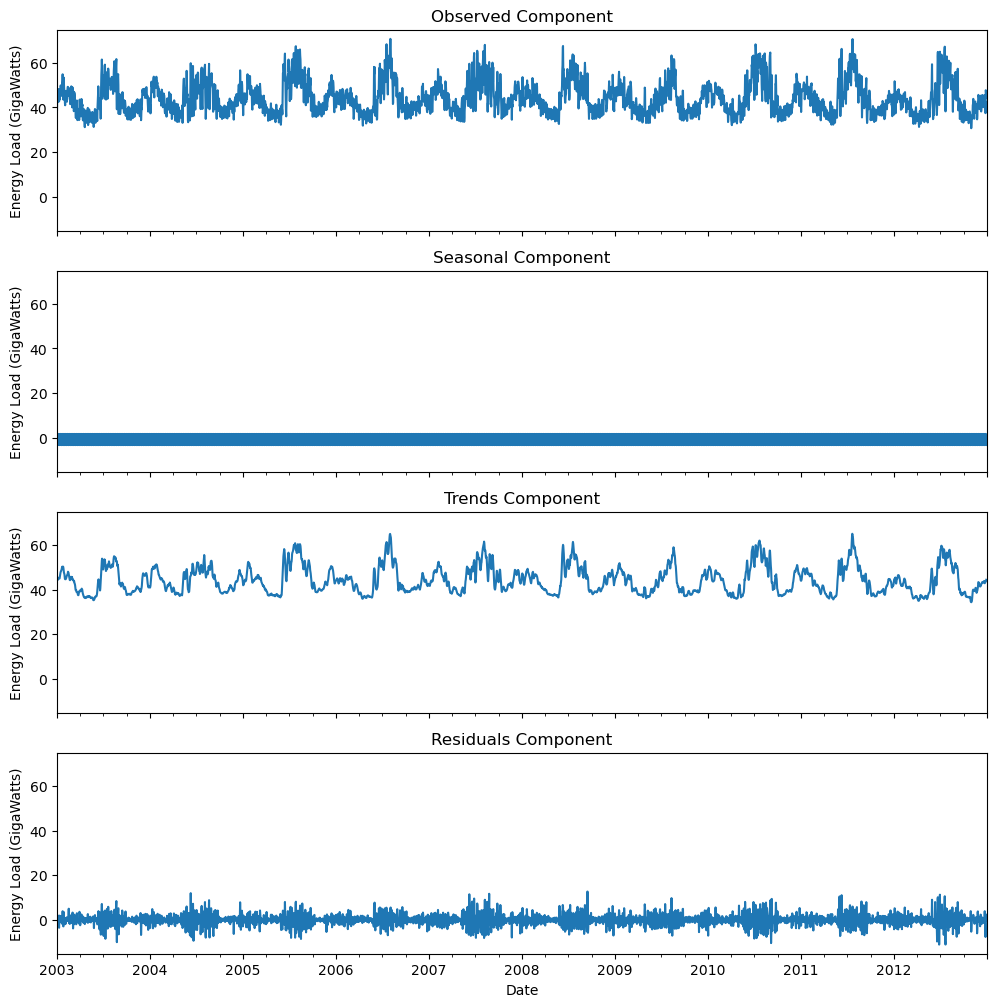

In [20]:
# Decompose Data
decomp_results = seasonal_decompose(df_ts)

# Break Decomp into separate parts to control plot visualization
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(12,12))

decomp_results.observed.plot(ax=ax1)
decomp_results.seasonal.plot(ax=ax2)
decomp_results.trend.plot(ax=ax3)
decomp_results.resid.plot(ax=ax4)

ax1.set_title("Observed Component")
ax2.set_title("Seasonal Component")
ax3.set_title("Trends Component")
ax4.set_title("Residuals Component")
ax1.set_ylabel("Energy Load (GigaWatts)")
ax2.set_ylabel("Energy Load (GigaWatts)")
ax3.set_ylabel("Energy Load (GigaWatts)")
ax4.set_ylabel("Energy Load (GigaWatts)")
plt.show()

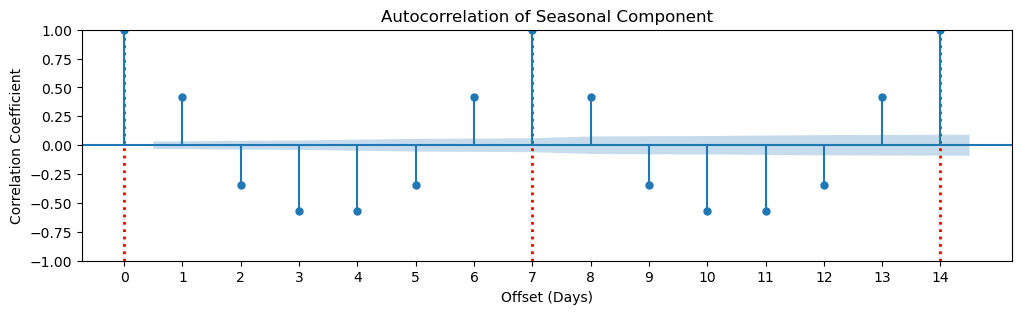

In [21]:
# Get Seasonal Period, Every AutoCorr Value 1.0 is a new period
fig, ax = plt.subplots(1, 1, figsize=(12,3))
ax.set_xlabel("Offset (Days)")
ax.set_ylabel("Correlation Coefficient")
ax.axvline(0, color='red', linestyle=":", linewidth=2)
ax.axvline(7, color='red', linestyle=":", linewidth=2)
ax.axvline(14, color='red', linestyle=":", linewidth=2)
fig = plot_acf(decomp_results.seasonal, lags=14, title="Autocorrelation of Seasonal Component", ax=ax)
ax.set_xticks(np.arange(0, 15, 1.0))
plt.show()

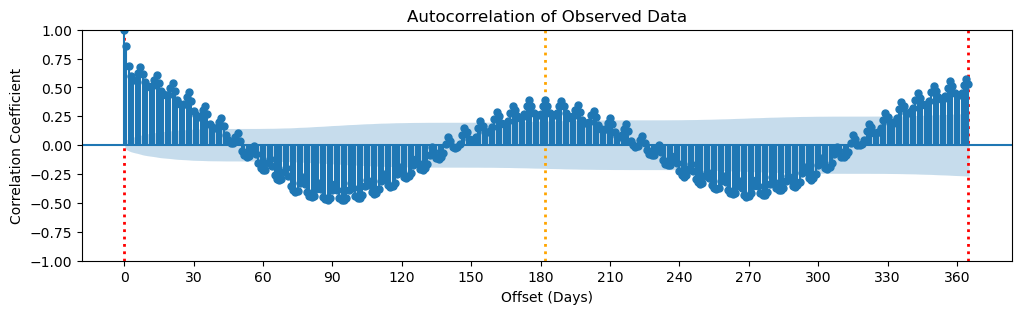

In [22]:
# Attempt to get ARIMA model data through Autocorrelation on observed data
fig, ax = plt.subplots(1, 1, figsize=(12,3))
ax.set_xlabel("Offset (Days)")
ax.set_ylabel("Correlation Coefficient")
ax.axvline(0, color='red', linestyle=":", linewidth=2)
ax.axvline(182, color='orange', linestyle=":", linewidth=2)
ax.axvline(365, color='red', linestyle=":", linewidth=2)
fig = plot_acf(df_ts, lags=365, title="Autocorrelation of Observed Data", ax=ax)
ax.set_xticks(np.arange(0, 365, 30.0))
plt.show()

Initial research into ARIMA/SARIMAX multiseasonal modeling ended with the solution being the manual expansion of periodic functions into trigonometry functions, called Fourier Terms. I was not comfortable with this process, so I began to look for other options. This is when I stumbled upon TBATS modeling. TBATS modeling is a time series modeling method that combines Trigonometric Seasonality, similar to the manual Fourier Terms method mentioned previously, Box-Cox Transformations, ARMA errors, Trend Components, and Seasonal Components. The combination of all these elements allows TBATS to accurately model incredibly complex seasonal components. The method was described in 2011 by De Livera, Hyndman, and Snyder, and an R implementation was created soon after. A Python version was not created until 2018. This version will be used for our analysis today.  
The main advantage of our TBATS model will be its accurate automated modeling of our multiseasonal time series data. The one disadvantage to this approach is the computation speed. TBATS analysis requires the scoring of many models, each with a different combination of the previously mentioned components. At this time, each component combination has to be tested to get an accurate model score, which requires a lot of computing time (Nadeem, 2021).

Analysis Steps:
1. Test and Train Split: A Test and Training Split will be made with two years as a test size. This amount was chosen since two years is a nice round amount of days, and it equates to roughly 25% of the data.
2. Modeling: A TBATS model is created with our two seasonal components as parameters, this will explicitly tell it what seasonal periods to use. This model is then fitted to our training data.
3. Prediction: Then the model predicts two year's worth of data, and returns predictions and confidence info.
4. Conversions: The predictions and confidence info are returned as raw arrays, so they need to be converted to Dataframes for ease of use. This follows the steps used previously to prepare the original data.
5. Evaluation: An evaluation of the model takes place, visually and with metrics. 

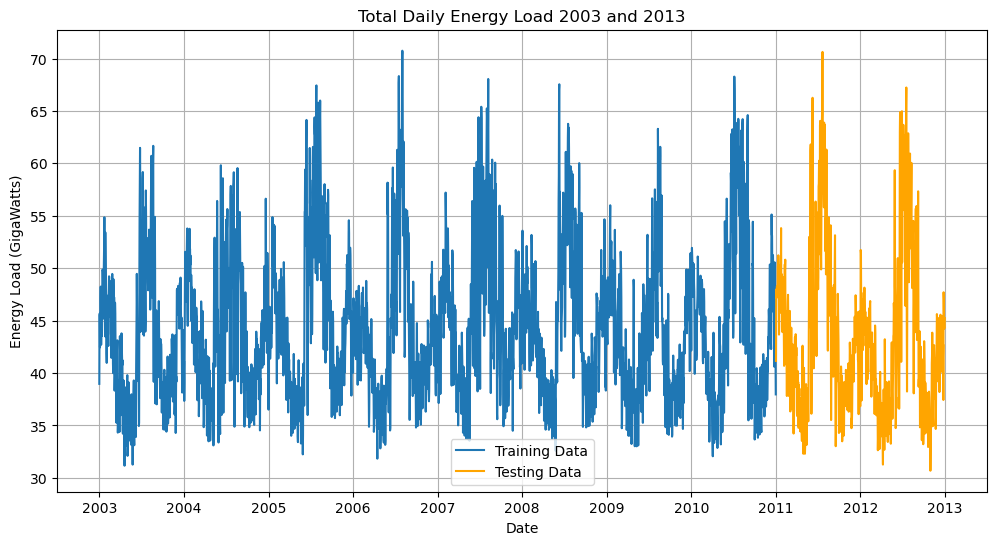

In [23]:
# Train & Test Split ~ 2 Years Test
df_train = df_ts[:-730]
df_test = df_ts[-730:]

# Plot Train and Test Split Observed Data
plt.figure(figsize=(12,6))
plt.plot(df_train, label="Training Data")
plt.plot(df_test, color='orange', label="Testing Data")
plt.grid()
plt.title("Total Daily Energy Load 2003 and 2013")
plt.xlabel("Date")
plt.ylabel("Energy Load (GigaWatts)")
plt.legend(loc="lower center")
plt.show()

In [24]:
# Initialize TBATS Model with known Seasonal Components
estimator=TBATS(seasonal_periods=[7, 365.25])

# Automate selection of TBATS model using Training Data
fitted_model = estimator.fit(df_train)

In [25]:
# Create Forecast and Confidence Intervals for Model
y_forecasted, confidence_info = fitted_model.forecast(steps=730, confidence_level=0.95)
print(f'AIC: {round(fitted_model.aic,2)}')

AIC: 29045.21


In [26]:
# Convert Forecast and Confidenct Intervals into DataFrames for easy of use
df_pred = pd.DataFrame({'Predicted': y_forecasted.tolist()})

df_conf = pd.DataFrame({
    'lower_bound': confidence_info.get('lower_bound'),
    'upper_bound': confidence_info.get('upper_bound')
})

# Set Date to be equal to training data, so predicted values overlay actual values accurately
start_date = df_test.index[0]

for df in [df_pred, df_conf]:
    df['i'] = df.index
    df["Date"] = start_date + (df.i).astype('timedelta64[D]')
    df.drop('i', axis=1, inplace=True)
    df.set_index('Date', inplace=True)

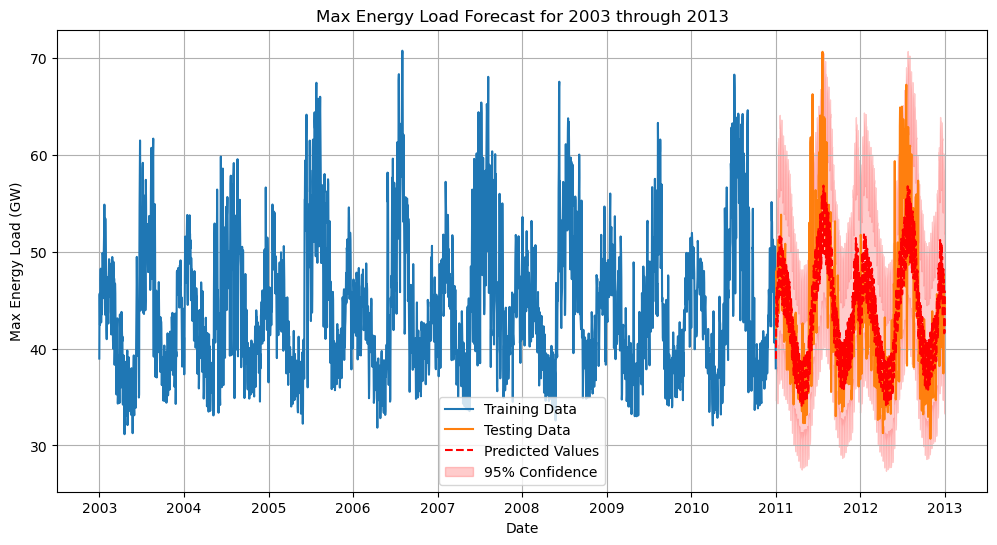

In [27]:
# Plot Train, Test, Predicted and Confidence Revenue Data
plt.figure(figsize=(12,6))
plt.plot(df_train, label="Training Data")
plt.plot(df_test, label="Testing Data")
plt.plot(
    df_pred,
    color='red',
    linestyle="--",
    label="Predicted Values"
)
plt.fill_between(
    df_conf.index,
    df_conf.lower_bound,
    df_conf.upper_bound,
    color="red",
    alpha=0.2,
    label="95% Confidence"
)
plt.grid()
plt.legend(loc='lower center')
plt.title("Max Energy Load Forecast for 2003 through 2013")
plt.xlabel("Date")
plt.ylabel("Max Energy Load (GW)")
plt.show()

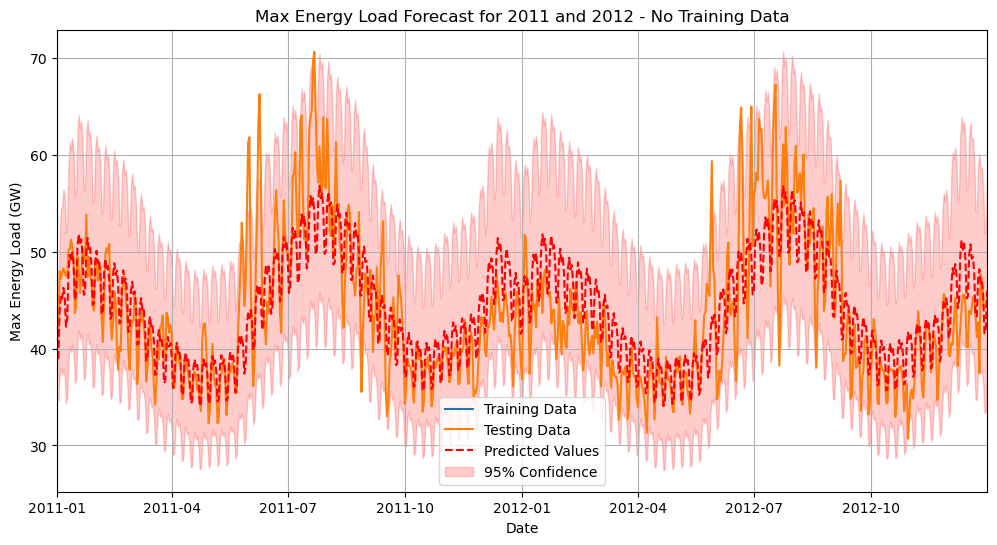

In [28]:
# Plot Test, Predicted and Confidence Revenue Data, zoomed in
plt.figure(figsize=(12,6))
plt.plot(df_train, label="Training Data")
plt.plot(df_test, label="Testing Data")
plt.plot(
    df_pred,
    color='red',
    linestyle="--",
    label="Predicted Values"
)
plt.fill_between(
    df_conf.index,
    df_conf.lower_bound,
    df_conf.upper_bound,
    color="red",
    alpha=0.2,
    label="95% Confidence"
)
plt.grid()
plt.legend(loc='lower center')
plt.xlim(14975,15705)
plt.title("Max Energy Load Forecast for 2011 and 2012 - No Training Data")
plt.xlabel("Date")
plt.ylabel("Max Energy Load (GW)")
plt.show()

In [29]:
print(fitted_model.summary())

Use Box-Cox: True
Use trend: True
Use damped trend: True
Seasonal periods: [  7.   365.25]
Seasonal harmonics [ 2 13]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.000000
Smoothing (Alpha): 1.119065
Trend (Beta): -0.274908
Damping Parameter (Phi): 0.800000
Seasonal Parameters (Gamma): [ 1.15705192e-07  1.17289531e-07 -1.48629994e-07  6.90120232e-07]
AR coefficients []
MA coefficients []
Seed vector [ 3.71454711e+00  2.12432636e-04  6.00693429e-02 -3.23856146e-02
 -8.44213047e-03  3.65583838e-04 -1.69031532e-02  1.11965774e-01
 -8.95374226e-03 -5.94752085e-03 -3.61429087e-03 -6.83443650e-03
 -2.82303379e-03 -1.19235298e-02 -8.11157388e-03 -1.48528638e-02
 -4.24852326e-03 -2.12875005e-03 -4.35713381e-03 -3.82606809e-02
  9.44918303e-02 -2.25303319e-02 -7.12399495e-03  6.27143224e-04
 -9.55966722e-03  1.04045378e-04 -2.03443666e-03 -7.15350900e-04
  2.47581555e-03  1.97398975e-03  1.69440821e-04  4.00807213e-03]

AIC 29045.205701


In [30]:
# Evaluation
# Create Df for MAE and MAPE Values
df_resid = df_test.copy()
df_resid['MAE'] = np.abs(df_test['Load'] - df_pred['Predicted'])
df_resid['MAPE'] = df_resid['MAE'] / df_test['Load']

# Evaluation Metrics
mae = np.mean(df_resid['MAE'])
mape = np.mean(df_resid['MAPE'])
mse = mean_squared_error(df_test, df_pred)

print(f'Mean Absolute Error:\t       {round(mae * 100, 2)} GigaWatts')
print(f'Mean Absolute Percentage Error:\t {round(mape * 100, 2)} %')
print(f'Forecasted MSE:\t\t\t{mse.round(2)}')
print(f'Forecasted RMSE:\t\t {np.sqrt(mse).round(2)} GigaWatts')

Mean Absolute Error:	       343.59 GigaWatts
Mean Absolute Percentage Error:	 7.67 %
Forecasted MSE:			21.26
Forecasted RMSE:		 4.61 GigaWatts


# Data Summary and Implications

The conclusion of this analysis, that the PJM East and West regions do not have statistically different means of max energy consumption, answers the research question and allows further time series forecasting based on the data. A forecast of the combined PJM East and West regions was completed since the difference in their means was not statistically significant. This time series analysis led to a TBATS model capable of forecasting with a mean absolute percentage error of 7.67%. On average, the forecast model was only off by 4.61 Gigawatts in max energy consumption.

One limitation of this analysis is how delicate the balance of stationarity and normality is. Depending on the aggreagation period and time range, it can become very difficult to remove stationarity from this dataset, and still meet a normal distribution. When the time range was set to be one year instead of ten, the data no longer was normally distributed, and when the aggregation period was set to one week instead of one month, the data was no longer able to be stationary and normally distributed. Choosing a good aggregation period, and time range while keeping as much data as possible requires a lot of trial and error.

I believe the next course of action for PJM will be to diagnose grid equipment to check it meets the max load values provided by the model. Since the model forecasted from the start of the year, if this was a hypothetical point of analysis, that would give PJM 7-8 months to assess the quality of equipment before the months of major power draw. Knowing this gives executives time to handle project management and get foresight into decision outcomes.

With the ability to accurately model complex seasonal time series data, and the conclusion that the regions do not have significant differences, a possible study direction would be to compare, using the paired t-test, different Regional transmission organizations since I could see more extreme climate and culture differences playing a major role in energy consumption. While PJM West and East were not significantly different, A much warmer climate may have the annual component offset, making the peaks occur at different times of the year, and a culture that doesn't value the work week may have a different weekly component. Another possible future study would be to use machine learning to detect anomalies in the dataset. Moments of major drops or spikes in maximum energy consumption may be indications of major equipment failure, energy theft, and other problems. A more complex analysis using Neural Networks may provide more insight into the cause of problems.

# Sources

Adam E.M. Eltorai, Bakal, J. A., Kim, D., & Wazer, D. (2023). Translational Radiation Oncology (pp. 153–163). Elsevier. https://www.sciencedirect.com/science/article/abs/pii/B9780323884235000704

BATS and TBATS time series forecasting. (2022, December 22). GitHub. https://github.com/intive-DataScience/tbats

Chugh, V. (2023, March 30). An Introduction to Python T-Tests. Datacamp. Retrieved January 14th, 2024, from https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests

De Livera, A.M., Hyndman, R.J., & Snyder, R. D. (2011), Forecasting time series with complex seasonal patterns using exponential smoothing, Journal of the American Statistical Association, 106(496), 1513-1527.

Grogan, M. SARIMAX model slopes downwards instead of upwards. (2021, August 2) Cross Validated. Retrieved January 8th, 2024, from https://stats.stackexchange.com/questions/538823/sarimax-model-slopes-downwards-instead-of-upwards

Hourly Energy Consumption. (2018, August 30). Www.kaggle.com. Retrieved January 8th, 2024, from https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption

GraphPad. How do I know if my data have a normal distribution? - FAQ 2185 - GraphPad. (n.d.). Www.graphpad.com; GraphPad. Retrieved January 14, 2024, from https://www.graphpad.com/support/faq/testing-data-for-normal-distrbution/

Mulla, R. (n.d.). https://www.linkedin.com/in/rob-mulla/ [Review of https://www.linkedin.com/in/rob-mulla/]. Linkedin; Linkedin. Retrieved January 8th, 2024, from https://www.linkedin.com/in/rob-mulla/

Nadeem. (2021, November 30). Time Series Forecasting using TBATS Model. Analytics Vidhya. Retrieved January 8th, 2024, from https://medium.com/analytics-vidhya/time-series-forecasting-using-tbats-model-ce8c429442a9

PJM - Home. (2024). Pjm.com. Retrieved January 8th, 2024, from https://pjm.com/

Schein, A., Bogiatzis-Gibbons, D., & Hardy, T. (2020). Guidance on conducting energy consumption analysis Created by the Behavioural Insights Team on behalf of the Department for Business, Energy and Industrial Strategy. In bi.team. The Behavioral Insights Team. Retrieved January 8th, 2024, from https://www.bi.team/wp-content/uploads/2020/12/Guidance-on-conducting-energy-consumption-analysis.pdf

Schendzielorz, T. (2020, January 15). A guide to Data Transformation. Medium. Retrieved January 8th, 2024, from https://medium.com/analytics-vidhya/a-guide-to-data-transformation-9e5fa9ae1ca3

Statistics Solutions. (2021, August 18). Paired Sample T-Test. Statistics Solutions. Retrieved January 14, 2024, https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/

Yearsley, J. (2024, January 1). Quantile-Quantile Plots. Www.ucd.ie. Retrieved January 14th, 2024, from https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html School of Biology and Environmental Science, UCD